<a href="https://colab.research.google.com/github/allyfll/pricetracker/blob/main/Space_Missions_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [189]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [190]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import Statements

In [191]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [192]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [193]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [194]:
df_data.shape

(4324, 9)

In [195]:
df_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [196]:
df_data.isna().values.any()

True

In [197]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [198]:
df_data.duplicated().values.any()

False

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [199]:
columns = ['Unnamed: 0', 'Unnamed: 0.1']

In [200]:
df_data = df_data.drop(columns, axis = 1)
df_data.head()
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


## Descriptive Statistics

In [201]:
df_data.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4324,4324,4324,4324,4324,964,4324
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Wed Nov 05, 2008 00:15 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3879


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [202]:
launches_per_company= df_data.Organisation.value_counts()
y_bar = px.bar(
    x= launches_per_company.index,
    y= launches_per_company.values,
    color = launches_per_company.values,
    color_continuous_scale = "Aggrnyl",
    title = "Number of Launches per Company"
)
y_bar.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [203]:
rockets = df_data.Rocket_Status.value_counts()
y_bar = px.bar(
    x= rockets.index,
    y= rockets.values,
    color = rockets.values,
    color_continuous_scale = "Spectral",
    title = "Number of Active versus Retired Rockets"
)
y_bar.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [204]:
ms = df_data.Mission_Status.value_counts()
y_bar = px.bar(
    x= ms.index,
    y= ms.values,
    color = ms.values,
    color_continuous_scale = "Aggrnyl",
    title = "Distribution of Mission Status"
)
y_bar.show()

In [205]:

fig = px.pie(labels=ms.index,
             values= ms.values,
             title= "Distribution of Mission Status",
             names = ms.index,
             hole = 0.4)
fig.update_traces(textposition= 'inside',textfont_size = 15, textinfo= 'percent')
fig.show()

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [206]:
expensive= px.histogram(df_data.sort_values(by=["Organisation", "Price"]), x="Price",nbins=10) 
expensive.update_xaxes(categoryorder='total ascending')


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [207]:
import iso3166
df_data["Country"] = df_data["Location"].str.split(", ").str[-1]
df_data.loc[(df_data["Country"] == 'Russia'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'New Mexico'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Yellow Sea'), "Country"] = "China"
df_data.loc[(df_data["Country"] == 'Shahrud Missile Test Site'), "Country"] = "Iran"
df_data.loc[(df_data["Country"] == 'Pacific Missile Range Facility'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Barents Sea'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'Gran Canaria'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Kazakhstan'), "Country"] = "Russian Federation"


In [208]:
countries = {country.name: key for key, country in iso3166.countries_by_alpha3.items()}
df_data = df_data.replace({"Country": countries})

launches = df_data["Country"].value_counts().rename_axis("Country").reset_index(name='counts')
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
 7   Country         4324 non-null   object
dtypes: object(8)
memory usage: 270.4+ KB


In [209]:
launches = df_data["Country"].value_counts().rename_axis("Country").reset_index(name='counts')
launches.tail()



,Country,counts
10,KEN,9
11,AUS,6
12,North Korea,5
13,South Korea,3
14,BRA,3


In [210]:
world_map = px.choropleth(launches, locations="Country", color="counts", color_continuous_scale=px.colors.sequential.matter)
world_map.update_layout(coloraxis_showscale=True)
world_map.show()
df_data.tail()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,RUS
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,RUS


# Use a Choropleth Map to Show the Number of Failures by Country


In [211]:
statuses = df_data.groupby("Country")["Mission_Status"].value_counts().rename_axis(["Country", "Status"]).reset_index(name='counts')
failures = statuses[statuses["Status"].str.contains("Fail")].groupby("Country").sum()

In [212]:
world_map = px.choropleth(failures, locations=failures.index, color="counts", color_continuous_scale=px.colors.sequential.matter)
world_map.update_layout(coloraxis_showscale=True)
world_map.show()


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [213]:
country_org_ms = df_data.groupby(by= ['Country', 'Organisation','Mission_Status'], as_index= False).size()
country_org_ms = country_org_ms.sort_values('size', ascending = False)



In [214]:
burst = px.sunburst(country_org_ms,
                    path= ['Country', 'Organisation', 'Mission_Status'],
                    values = 'size',
                    title = 'Distribution of Lauches made by Country(Detailed)')
burst.update_layout(xaxis_title = 'Number of launches',
                    yaxis_title = 'Organisation',
                    coloraxis_showscale= False)


# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [215]:
money_spent = df_data[df_data["Price"].notna()]

money_spent["Price"] = money_spent["Price"].str.replace(',', '').astype(float)

total_money_spent = money_spent.groupby("Organisation")["Price"].sum().reset_index()
total_money_spent.sort_values(by="Price", ascending=False)
total_money_spent.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,Price
0,Arianespace,"16,345.00"
1,Boeing,"1,241.00"
2,CASC,"6,340.26"
3,EER,20.00
4,ESA,37.00


# Analyse the Amount of Money Spent by Organisation per Launch

In [216]:
organisation_money_spent = money_spent.groupby("Organisation")["Price"].mean().reset_index()
organisation_money_spent.sort_values(by="Price", ascending=False)
organisation_money_spent.head()

,Organisation,Price
0,Arianespace,170.26
1,Boeing,177.29
2,CASC,40.13
3,EER,20.00
4,ESA,37.00


# Chart the Number of Launches per Year

In [217]:
df_data['Date'] = pd.to_datetime(df_data['Date'], utc=True)
df_data['year'] = df_data['Date'].apply(lambda datetime: datetime.year)

ds = df_data['year'].value_counts().reset_index()
ds.columns = [
    'year', 
    'count']


In [218]:
fig = px.bar(
    ds, 
    x='year', 
    y="count", 
    orientation='v', 
    title='Missions number by year' )
fig.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [219]:
df_data['date'] = pd.to_datetime(df_data['Date'])
df_data['month'] = df_data['date'].apply(lambda datetime: datetime.month)

ds = df_data['month'].value_counts().reset_index()
ds.columns = [
    'month', 
    'count']
fig = px.bar(
    ds, 
    x='month', 
    y="count", 
    orientation='v', 
    title='Missions number by month' )
fig.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [220]:
most_launches = ds['count'].max()
print("Most launches in a month =", most_launches)

ds.sort_values(by="count", ascending=False)
ds.max()

Most launches in a month = 450


month     12
count    450
dtype: int64

In [221]:
least_launches = ds['count'].min()
print("Least launches in a month =", least_launches)

ds.sort_values(by="count", ascending=False)
ds.min()

Least launches in a month = 268


month      1
count    268
dtype: int64

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



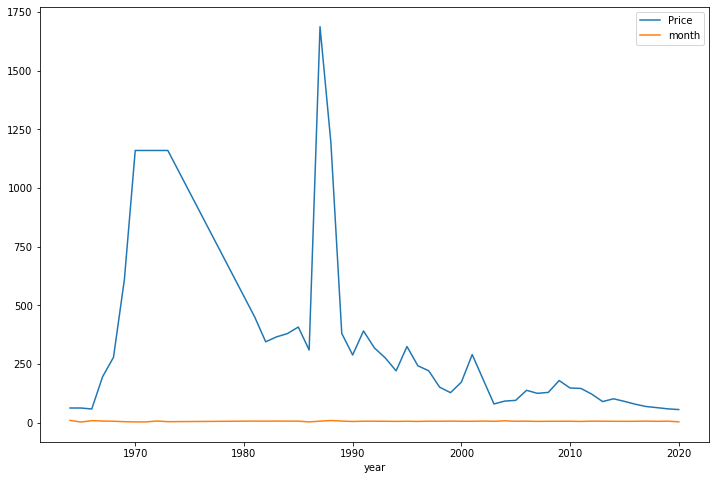

In [222]:
avg_price = df_data[df_data["Price"].notna()]

avg_price["Price"] = avg_price["Price"].str.replace(',', '').astype(float)

avg_price.groupby("year").mean().plot(figsize=(12, 8))

In [223]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           964 non-null    object             
 6   Mission_Status  4324 non-null   object             
 7   Country         4324 non-null   object             
 8   year            4324 non-null   int64              
 9   date            4324 non-null   datetime64[ns, UTC]
 10  month           4324 non-null   int64              
dtypes: datetime64[ns, UTC](2), int64(2), object(7)
memory usage: 371.7+ KB


# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [224]:
total = df_data.groupby("Organisation").count().reset_index().sort_values("Location",ascending=False)
total["Total"] = total["Location"]
total = total[["Organisation","Total"]].set_index("Organisation")
by_organisation = df_data.groupby(["Organisation","year"]).count()
by_organisation = by_organisation.join(total).reset_index().groupby(["Organisation","Total","year"]).sum().sort_values("Total",0,False)
by_organisation.head()



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

In a future version of pandas all arguments of DataFrame.sort_values except for the argument 'by' will be keyword-only



Location  Date  Detail  Rocket_Status  Price  \
Organisation Total year                                                 
RVSN USSR    1777  1987        42    42      42             42      1   
                   1969        82    82      82             82      0   
                   1966        51    51      51             51      0   
                   1965        53    53      53             53      0   
                   1964        36    36      36             36      0   

                         Mission_Status  Country  date  month  
Organisation Total year                                        
RVSN USSR    1777  1987              42       42    42     42  
                   1969              82       82    82     82  
                   1966              51       51    51     51  
                   1965              53       53    53     53  
                   1964              36       36    36     36

In [225]:
orgs = by_organisation.index.get_level_values("Organisation")
first_10 = {}
for org in orgs:
    if len(first_10.keys()) <= 10:
        if org in first_10.keys():
            first_10[org] += 1
        else:
            first_10[org] = 1
total_rows = sum(first_10.values())
print(total_rows)
print(first_10)

324
{'RVSN USSR': 39, 'Arianespace': 37, 'CASC': 47, 'General Dynamics': 37, 'NASA': 46, 'VKS RF': 29, 'US Air Force': 25, 'ULA': 15, 'Boeing': 18, 'Martin Marietta': 30, 'SpaceX': 1}


In [226]:
by_organisation.iloc[320:325]

Location  Date  Detail  Rocket_Status  Price  \
Organisation    Total year                                                 
Martin Marietta 114   1979         4     4       4              4      0   
                      1985         2     2       2              2      0   
                      1986         1     1       1              1      0   
SpaceX          100   2007         1     1       1              1      1   
                      2014         6     6       6              6      6   

                            Mission_Status  Country  date  month  
Organisation    Total year                                        
Martin Marietta 114   1979               4        4     4      4  
                      1985               2        2     2      2  
                      1986               1        1     1      1  
SpaceX          100   2007               1        1     1      1  
                      2014               6        6     6      6

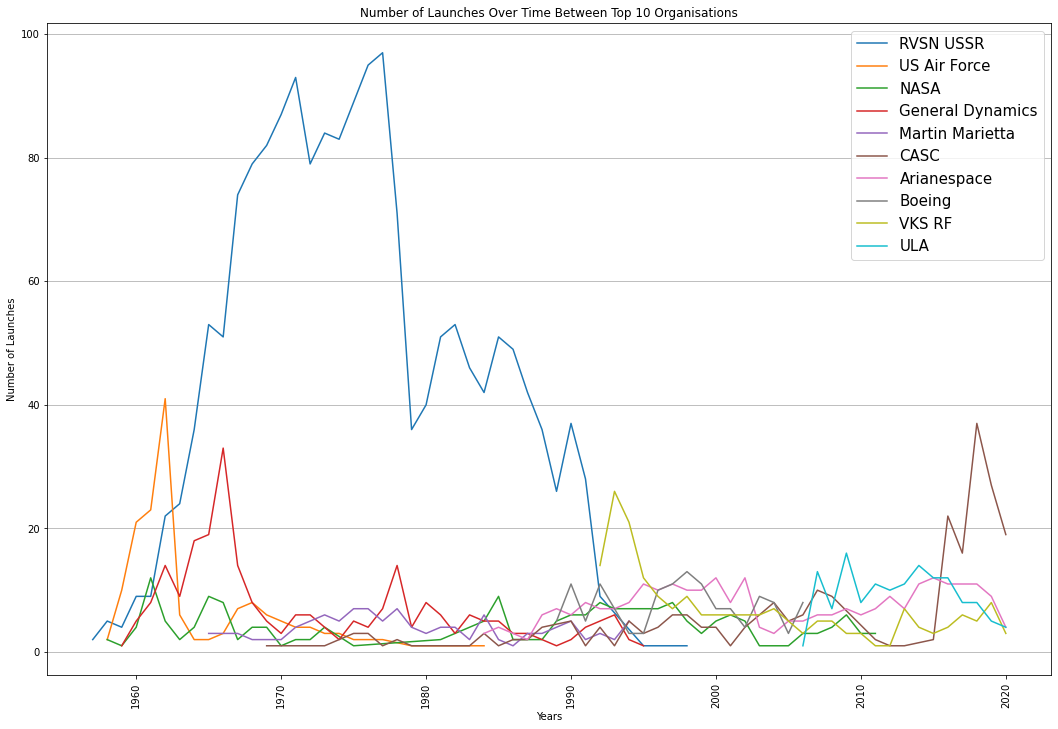

In [227]:
plt.figure(figsize=(18,12))
g = sns.lineplot(data=by_organisation.iloc[:323].sort_values("year"), x="year", y="Location", hue="Organisation")
plt.grid(axis="y")
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.ylabel("Number of Launches")
plt.title("Number of Launches Over Time Between Top 10 Organisations")
plt.legend(fontsize=15)

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [228]:
comparison = df_data[(df_data['Country']=='USA') | (df_data['Country']=='RUS')]

In [229]:
cold_war_years = comparison.sort_values("year")

cold_war_years[(cold_war_years.year <= 1991)]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,year,date,month
4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04 19:28:00+00:00,Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success,RUS,1957,1957-10-04 19:28:00+00:00,10
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,RUS,1957,1957-11-03 02:30:00+00:00,11
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA,1957,1957-12-06 16:44:00+00:00,12
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA,1958,1958-02-01 03:48:00+00:00,2
4293,US Air Force,"LC-11, Cape Canaveral AFS, Florida, USA",1958-12-18 23:02:00+00:00,SM-65B Atlas | SCORE,StatusRetired,NaN,Success,USA,1958,1958-12-18 23:02:00+00:00,12
...,...,...,...,...,...,...,...,...,...,...,...
1755,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1991-04-28 11:33:00+00:00,Space Shuttle Discovery | STS-39,StatusRetired,450.0,Success,USA,1991,1991-04-28 11:33:00+00:00,4
1754,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1991-05-14 15:52:00+00:00,Atlas-E/F Star-37S-ISS | NOAA-D,StatusRetired,NaN,Success,USA,1991,1991-05-14 15:52:00+00:00,5
1753,RVSN USSR,"Site 32/2, Plesetsk Cosmodrome, Russia",1991-05-16 21:40:00+00:00,Tsyklon-3 | Cosmos 2143 to 2148,StatusRetired,NaN,Success,RUS,1991,1991-05-16 21:40:00+00:00,5
1762,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1991-03-22 12:19:00+00:00,Molniya-M /Block ML | Molniya-3 n†­148,StatusRetired,NaN,Success,RUS,1991,1991-03-22 12:19:00+00:00,3


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [230]:
launches = cold_war_years["Country"].value_counts().rename_axis("Country").reset_index(name='counts')

launches.head()

,Country,counts
0,RUS,2099
1,USA,1351


([<matplotlib.patches.Wedge at 0x7ff4ee45f7d0>,
 [Text(-0.36742349695818666, 1.0368220550716587, 'RUS'),
  Text(0.3674233998838983, -1.0368220894723246, 'USA')])

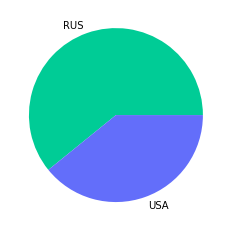

In [231]:
colors = ["#00CC96", "#636EFA"]
grouping = cold_war_years.groupby("Country").count().reset_index()
sizes = grouping['Mission_Status']
labels = grouping['Country']

plt.pie(sizes, labels = labels, colors = colors)

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

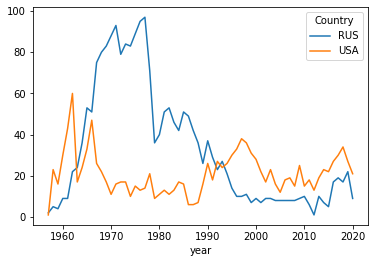

In [232]:
cold_war_years = cold_war_years[(cold_war_years['Country']=='USA') | (cold_war_years['Country']=='RUS')]
cold_war_years.groupby(["year", "Country"]).size().unstack().plot()

## Chart the Total Number of Mission Failures Year on Year.

In [233]:
failures = df_data[df_data["Mission_Status"]!="Success"]
failures = failures.groupby("year").count()
failures

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,date,month
year,,,,,,,,,,
1957,1,1,1,1,1,0,1,1,1,1
1958,22,22,22,22,22,0,22,22,22,22
1959,12,12,12,12,12,0,12,12,12,12
1960,20,20,20,20,20,0,20,20,20,20
1961,20,20,20,20,20,0,20,20,20,20
...,...,...,...,...,...,...,...,...,...,...
2016,4,4,4,4,4,3,4,4,4,4
2017,8,8,8,8,8,4,8,8,8,8
2018,4,4,4,4,4,1,4,4,4,4


Text(0.5, 1.0, 'Number of Failures Year on Year')

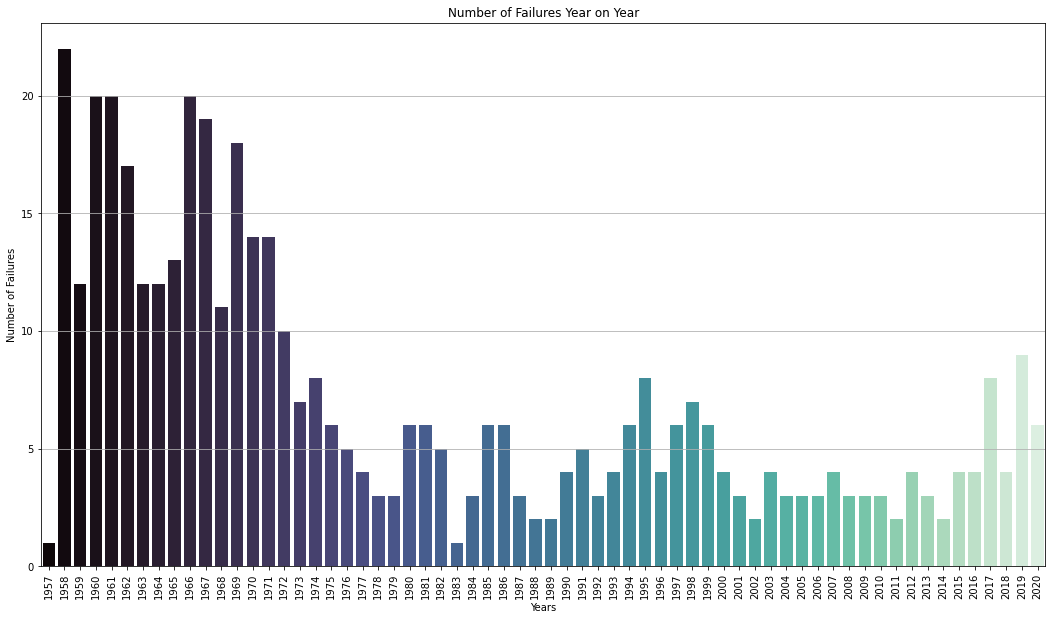

In [234]:
plt.figure(figsize=(18,10))
g = sns.barplot(data=failures.reset_index(), x="year", y="Date", palette="mako")
plt.grid(axis="y")
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.ylabel("Number of Failures")
plt.title("Number of Failures Year on Year")

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [235]:
df_data["Country"] = df_data["Location"].str.split().str[-1]
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,year,date,month
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,2020,2020-08-07 05:12:00+00:00,8
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,2020,2020-08-06 04:01:00+00:00,8
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,2020,2020-08-04 23:57:00+00:00,8
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,2020,2020-07-30 21:25:00+00:00,7
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,2020,2020-07-30 11:50:00+00:00,7


In [236]:
by_country = df_data.groupby(["Country","year"]).count().reset_index()
by_country

,Country,year,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,date,month
0,Australia,1967,1,1,1,1,1,0,1,1,1
1,Australia,1968,1,1,1,1,1,0,1,1,1
2,Australia,1969,1,1,1,1,1,0,1,1,1
3,Australia,1970,2,2,2,2,2,0,2,2,2
4,Australia,1971,1,1,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
430,USA,2020,21,21,21,21,21,20,21,21,21
431,Zealand,2017,1,1,1,1,1,1,1,1,1
432,Zealand,2018,3,3,3,3,3,3,3,3,3
433,Zealand,2019,6,6,6,6,6,6,6,6,6


In [237]:
country_arr = []
for i in by_country["year"].unique():
    filtered_by_year = by_country[(by_country["year"]==i)]
    s = filtered_by_year[filtered_by_year["date"]==filtered_by_year["date"].max()][["year","Country"]]
    country_arr.append(list(s.iloc[0]))
country_arr = pd.DataFrame(country_arr, columns=(["year","Country"])).sort_values("year",0,True)
country_arr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

In a future version of pandas all arguments of DataFrame.sort_values except for the argument 'by' will be keyword-only



,year,Country
56,1957,Kazakhstan
57,1958,USA
58,1959,USA
59,1960,USA
60,1961,USA
...,...,...
45,2016,USA
46,2017,USA
47,2018,China
48,2019,China


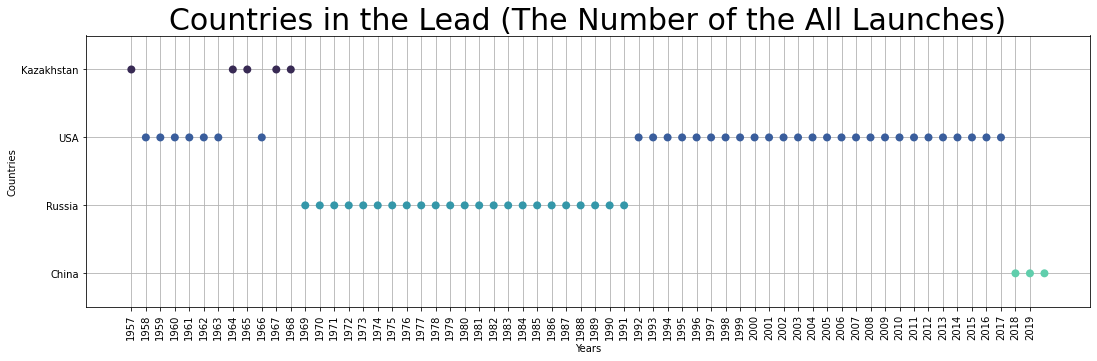

In [238]:
plt.figure(figsize=(18,5))
g = sns.swarmplot(data=country_arr,x="year",y="Country", palette="mako",size=8)
plt.grid(axis="y")
plt.grid(axis="x")
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.ylabel("Countries")
plt.title("Countries in the Lead (The Number of the All Launches)", size=30)
plt.xticks(range(1957,2020))
plt.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

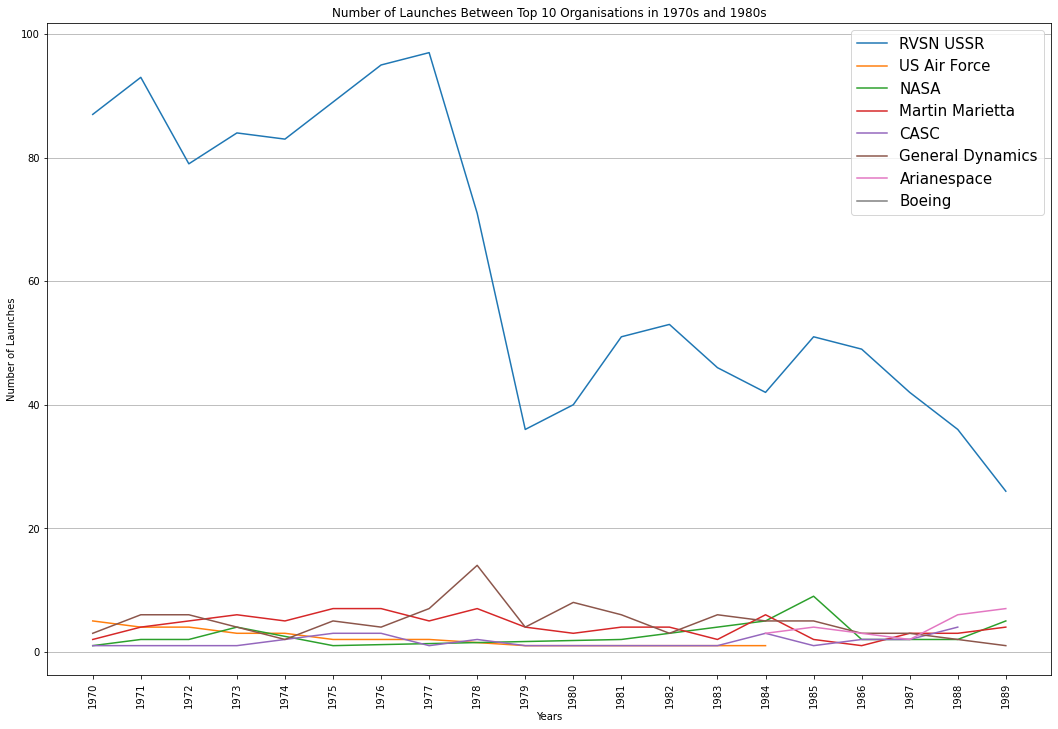

In [239]:
new_org = by_organisation.iloc[:323].reset_index()
new_org["Year"] = new_org["year"].astype(int)
new_org = new_org[new_org["year"].isin(range(1970,1990))].sort_values("year")
new_org["Year"] = new_org["year"].astype(str)

plt.figure(figsize=(18,12))
g = sns.lineplot(data=new_org, x="Year", y="Location", hue="Organisation")
plt.grid(axis="y")
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.ylabel("Number of Launches")
plt.title("Number of Launches Between Top 10 Organisations in 1970s and 1980s")
plt.legend(fontsize=15)

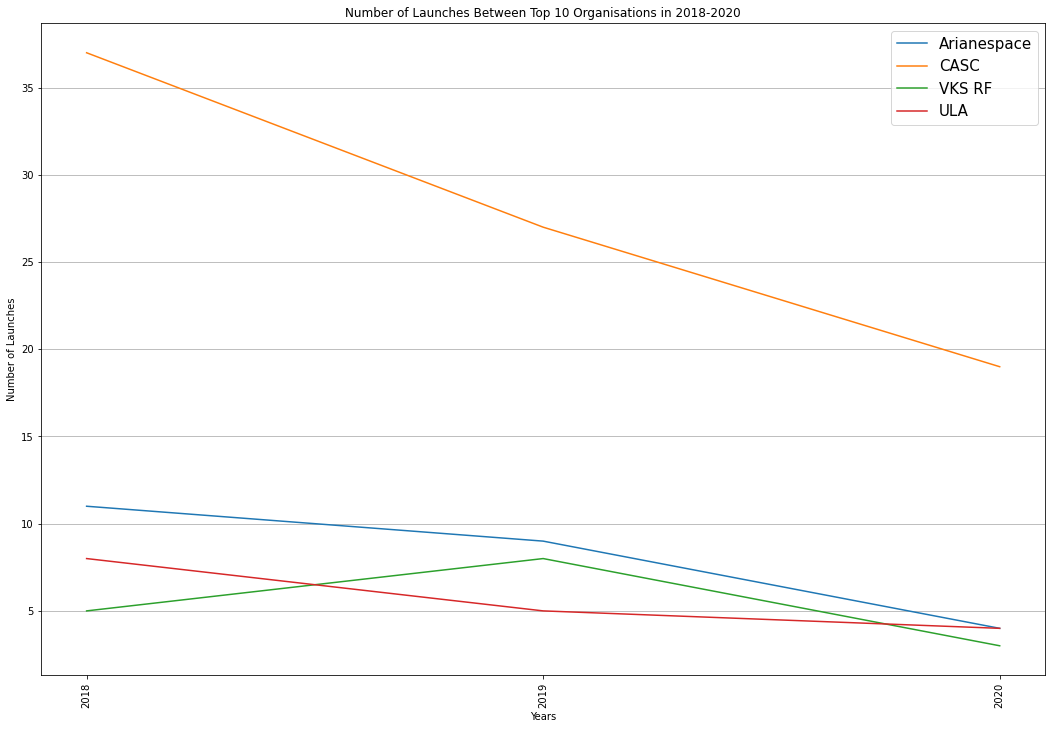

In [240]:
new_org = by_organisation.iloc[:323].reset_index()
new_org["Year"] = new_org["year"].astype(int)
new_org = new_org[new_org["year"].isin(range(2018,2021))].sort_values("year")
new_org["Year"] = new_org["year"].astype(str)

plt.figure(figsize=(18,12))
g = sns.lineplot(data=new_org, x="Year", y="Location", hue="Organisation")
plt.grid(axis="y")
plt.xticks(rotation=90)
plt.xlabel("Years")
plt.ylabel("Number of Launches")
plt.title("Number of Launches Between Top 10 Organisations in 2018-2020")
plt.legend(fontsize=15)